In [1]:
from oLIMpus import * 
import matplotlib.pyplot as plt

In [2]:
User_Parameters_use = User_Parameters(
    precisionboost= 1.0, 
    FLAG_FORCE_LINEAR_CF= 0, 
    MIN_R_NONLINEAR= 2.0, 
    MAX_R_NONLINEAR= 100.0,
    FLAG_DO_DENS_NL= False, 
    FLAG_WF_ITERATIVE= True
    )

In [3]:
from classy import Class
ClassCosmo = Class()
ClassCosmo.compute()

CosmoParams_input = Cosmo_Parameters_Input(HMF_CHOICE='ST')
CosmoParams_use, ClassyCosmo_use, CorrFclass_21_use ,HMFintclass_use =  cosmo_wrapper(User_Parameters_use, CosmoParams_input)

In [40]:
AstroParams_use = zeus21.Astro_Parameters(User_Parameters_use, CosmoParams_use, USE_POPIII = False, USE_LW_FEEDBACK = False, astromodel=0)
AstroParams_use1 = zeus21.Astro_Parameters(User_Parameters_use, CosmoParams_use, USE_POPIII = False, USE_LW_FEEDBACK = False, astromodel=1)

In [41]:
LineParams_Input_SFR = LineParams_Input(
    LINE = 'OIII', # which line
    LINE_MODEL = 'SFRD', # model of the line luminosity
    OBSERVABLE_LIM = 'Inu', # observe intensity in Jy/sr or mK
    _R = 0.5, # resolution for smoothing
    sigma_LSFR = 0., # stochasticity in the L-SFR relation
    shot_noise = False, # add shot noise to the power spectrum
    Eulerian = True, # Eulerian or Lagrangian space, MOVE TO USER PARAMS
    quadratic_lognormal = False # use 1st or 2nd order in the SFRD and line lognormal approximation MOVE TO USER PARAMS
)

Line_Parameters_SFR = Line_Parameters(LineParams_Input_SFR)

LineParams_Input_use = LineParams_Input(
    LINE = 'OIII', # which line
    LINE_MODEL = 'Yang24', # model of the line luminosity
    OBSERVABLE_LIM = 'Inu', # observe intensity in Jy/sr or mK
    _R = 0.5, # resolution for smoothing
    sigma_LSFR = 0., # stochasticity in the L-SFR relation
    shot_noise = False, # add shot noise to the power spectrum
    Eulerian = True, # Eulerian or Lagrangian space, MOVE TO USER PARAMS
    quadratic_lognormal = False # use 1st or 2nd order in the SFRD and line lognormal approximation MOVE TO USER PARAMS
)

Line_Parameters_use = Line_Parameters(LineParams_Input_use)

In [42]:
ZMIN = 5.

/mnt/DATA/coding/21cm/oLIMpus/oLIMpus/LIM_modeling.py:185: RuntimeWarning: divide by zero encountered in log10
  log10_L = np.log10(dotM)
/tmp/ipykernel_330627/4113557278.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(M,np.log10(SFR[z_id,:,0]))
/tmp/ipykernel_330627/4113557278.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(M,np.log10(SFR1[z_id,:,0]))


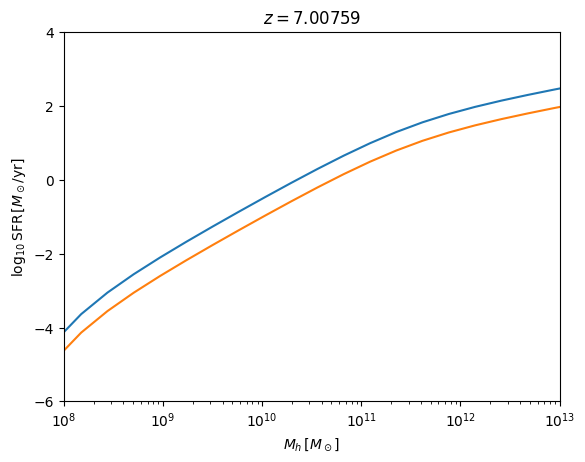

/mnt/DATA/coding/21cm/oLIMpus/oLIMpus/LIM_modeling.py:204: RuntimeWarning: divide by zero encountered in power
  L_line = 2. * N * dotM / ((dotM / SFR1)**(-alpha) + (dotM / SFR1)**beta)
/mnt/DATA/coding/21cm/oLIMpus/oLIMpus/LIM_modeling.py:206: RuntimeWarning: divide by zero encountered in log10
  log10_L = np.log10(L_line)
/tmp/ipykernel_330627/4113557278.py:29: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(SFR[z_id,:,0]),np.log10(OIII[z_id,:,0]))
/tmp/ipykernel_330627/4113557278.py:30: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(SFR[z_id,:,0]),np.log10(OIII1[z_id,:,0]))


Text(0.5, 1.0, '${\\rm OIII},\\,$$z=7.00759$')

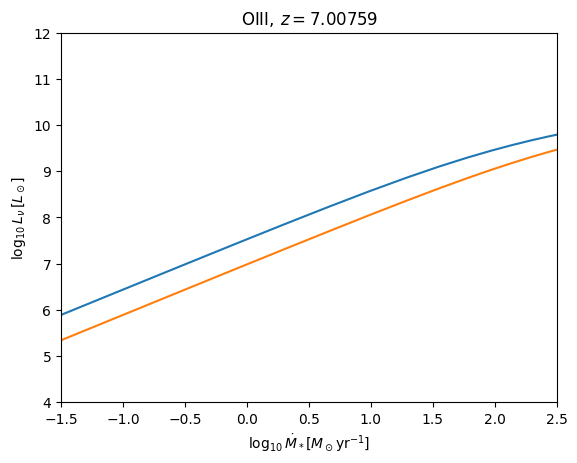

In [44]:
M = HMFintclass_use.Mhtab

Nsigmad = 1.0 #how many sigmas we explore
Nds = 3 #how many deltas
deltatab_norm = np.linspace(-Nsigmad,Nsigmad,Nds)
_dlogzint_target = 0.02/User_Parameters_use.precisionboost
Nzintegral = np.ceil(1.0 + np.log(ZMAX_INTEGRAL/ZMIN)/_dlogzint_target).astype(int)
dlogzint = np.log(ZMAX_INTEGRAL/ZMIN)/(Nzintegral-1.0) #exact value rather than input target above
zintegral = np.logspace(np.log10(ZMIN), np.log10(ZMAX_INTEGRAL), Nzintegral)

zArray_LIM, mArray_LIM, deltaNormArray_LIM = np.meshgrid(zintegral, M, deltatab_norm, indexing = 'ij', sparse = True)

SFR = LineLuminosity(False, Line_Parameters_SFR, AstroParams_use, CosmoParams_use, HMFintclass_use, mArray_LIM, zArray_LIM)
SFR1 = LineLuminosity(False, Line_Parameters_SFR, AstroParams_use1, CosmoParams_use, HMFintclass_use, mArray_LIM, zArray_LIM)

z_id = 17
plt.semilogx(M,np.log10(SFR[z_id,:,0]))
plt.semilogx(M,np.log10(SFR1[z_id,:,0]))
plt.ylim(-6,4)
plt.xlim(1e8,1e13)
plt.xlabel(r'$M_h\,[M_\odot]$')
plt.ylabel(r'$\log_{10}{\rm SFR}\,[M_\odot/{\rm yr}]$')
plt.title(r'$z=%g$'%zintegral[z_id])
plt.show()

OIII = LineLuminosity(False, Line_Parameters_use, AstroParams_use, CosmoParams_use, HMFintclass_use, mArray_LIM, zArray_LIM)
OIII1 = LineLuminosity(False, Line_Parameters_use, AstroParams_use1, CosmoParams_use, HMFintclass_use, mArray_LIM, zArray_LIM)

plt.plot(np.log10(SFR[z_id,:,0]),np.log10(OIII[z_id,:,0]))
plt.plot(np.log10(SFR[z_id,:,0]),np.log10(OIII1[z_id,:,0]))
plt.ylim(4,12)
plt.xlim(-1.5,2.5)
plt.xlabel(r'$\log_{10} \dot{M}_* [M_\odot{\rm yr^{-1}}]$')
plt.ylabel(r'$\log_{10} L_\nu\,[L_\odot]$')
plt.title(r'${\rm OIII},\,$' + r'$z=%g$'%zintegral[z_id])


In [45]:
SFR_lin_coeff = get_LIM_coefficients(Line_Parameters_SFR, AstroParams_use, CosmoParams_use, HMFintclass_use, User_Parameters_use, ZMIN)

OIII_lin_coeff = get_LIM_coefficients(Line_Parameters_use, AstroParams_use, CosmoParams_use, HMFintclass_use, User_Parameters_use, ZMIN)
OIII_lin_coeff1 = get_LIM_coefficients(Line_Parameters_use, AstroParams_use1, CosmoParams_use, HMFintclass_use, User_Parameters_use, ZMIN)

/mnt/DATA/coding/21cm/oLIMpus/oLIMpus/LIM_modeling.py:185: RuntimeWarning: divide by zero encountered in log10
  log10_L = np.log10(dotM)
/mnt/DATA/coding/21cm/oLIMpus/oLIMpus/LIM_modeling.py:204: RuntimeWarning: divide by zero encountered in power
  L_line = 2. * N * dotM / ((dotM / SFR1)**(-alpha) + (dotM / SFR1)**beta)
/mnt/DATA/coding/21cm/oLIMpus/oLIMpus/LIM_modeling.py:206: RuntimeWarning: divide by zero encountered in log10
  log10_L = np.log10(L_line)


(0.001, 300.0)

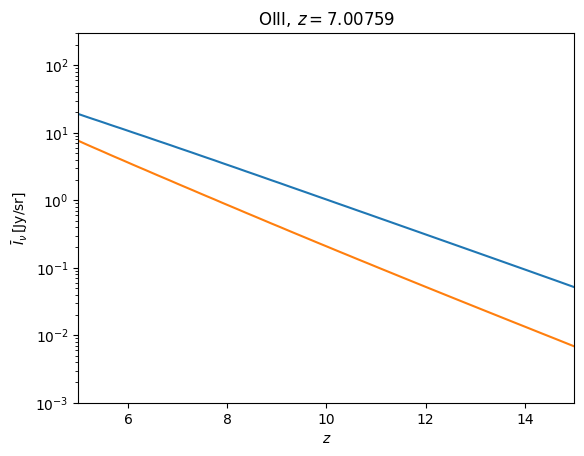

In [ ]:
plt.semilogy(zintegral,OIII_lin_coeff.Inu_avg,)
plt.semilogy(zintegral,OIII_lin_coeff1.Inu_avg,)
plt.title(r'${\rm OIII},\,$' + r'$z=%g$'%zintegral[z_id])
plt.xlabel(r'$z$')
plt.ylabel(r'$\bar{I}_\nu\,[{\rm Jy/sr}]$')
plt.xlim(5,15)
plt.ylim(1e-3,3e2)
plt.show()